# bosten city car price prediction

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from skimpy import skim

In [7]:
data=pd.read_csv('car data.csv')

In [8]:
data 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [14]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 301    │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 9      │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %  ┃ mean      ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year             │   0 │     0 │      2014 │   2.892 │  2003 │   2012 │   2014 │   2016 │    2018 │   ▂▃▇▅ │  │
│ │ Selling_Price    │   0 │     0 │     4.661 │   5.083 │   0.1 │    0.9 │    3.6 │      6 │      35 │   ▇▂   │  │
│ │ Present_Price    │   0 │     0 │     7.628 │   8.644 │  0.32 │    1.2 │    6.4 │    9.9 │    92.6 │   ▇▁   │  │
│ │ Kms_Driven       │   0 │     0 │     36950 │   38890 │   500 │  15000 │  32000 │  48770 │  500000 │   ▇    │  │
│ │ Owner            │   0 │     0 │   0.04319 │  0.2479 │     0 │      0 │      0 │      0 │       3 │   ▇    │  │
│ └──────────────────┴─────┴───────┴───────────┴─────────┴───────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA     ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Car_Name                   │      0 │          0 │                            2 │                      592 │  │
│ │ Fuel_Type                  │      0 │          0 │                            1 │                      301 │  │
│ │ Seller_Type                │      0 │          0 │                            1 │                      301 │  │
│ │ Transmission               │      0 │          0 │                            1 │                      301 │  │
│ └────────────────────────────┴────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [40]:
data.Owner.unique()

array([0, 1, 3], dtype=int64)

In [41]:
data.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [43]:
data.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [45]:
data.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [47]:
import seaborn as sn

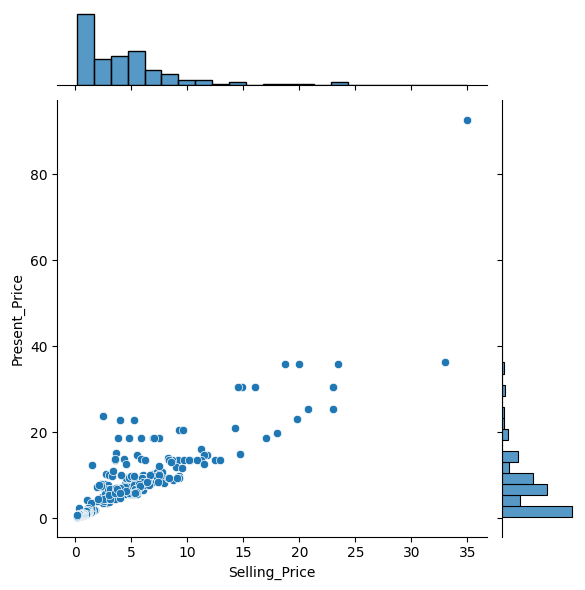

In [48]:
sn.jointplot(x='Selling_Price',y='Present_Price',data=data)

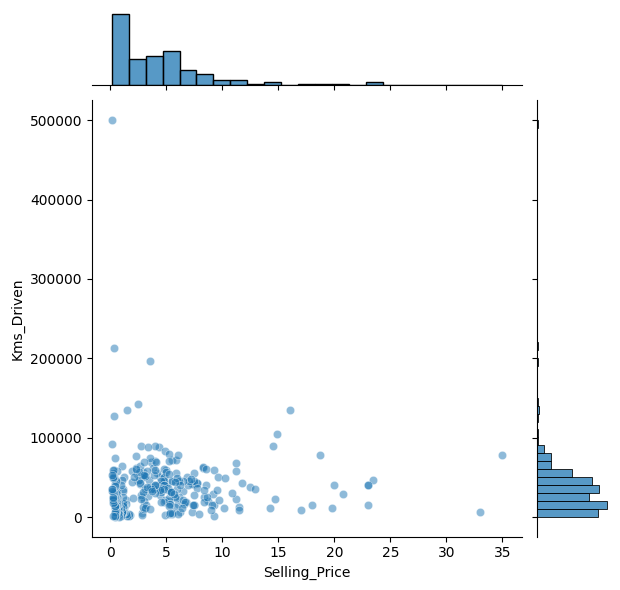

In [51]:
sn.jointplot(x='Selling_Price',y='Kms_Driven',data=data,alpha=0.5)

# exploratory data analist

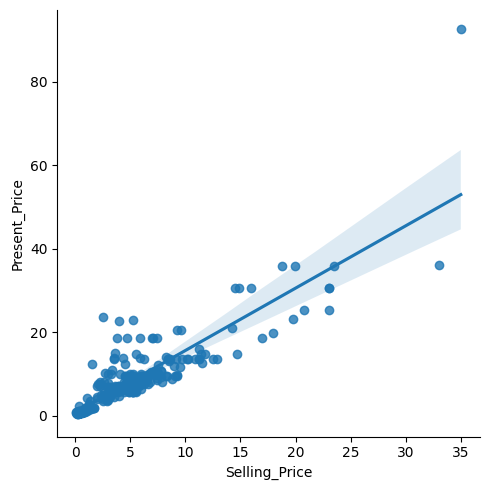

In [53]:
sn.lmplot(x='Selling_Price',y='Present_Price',data=data)

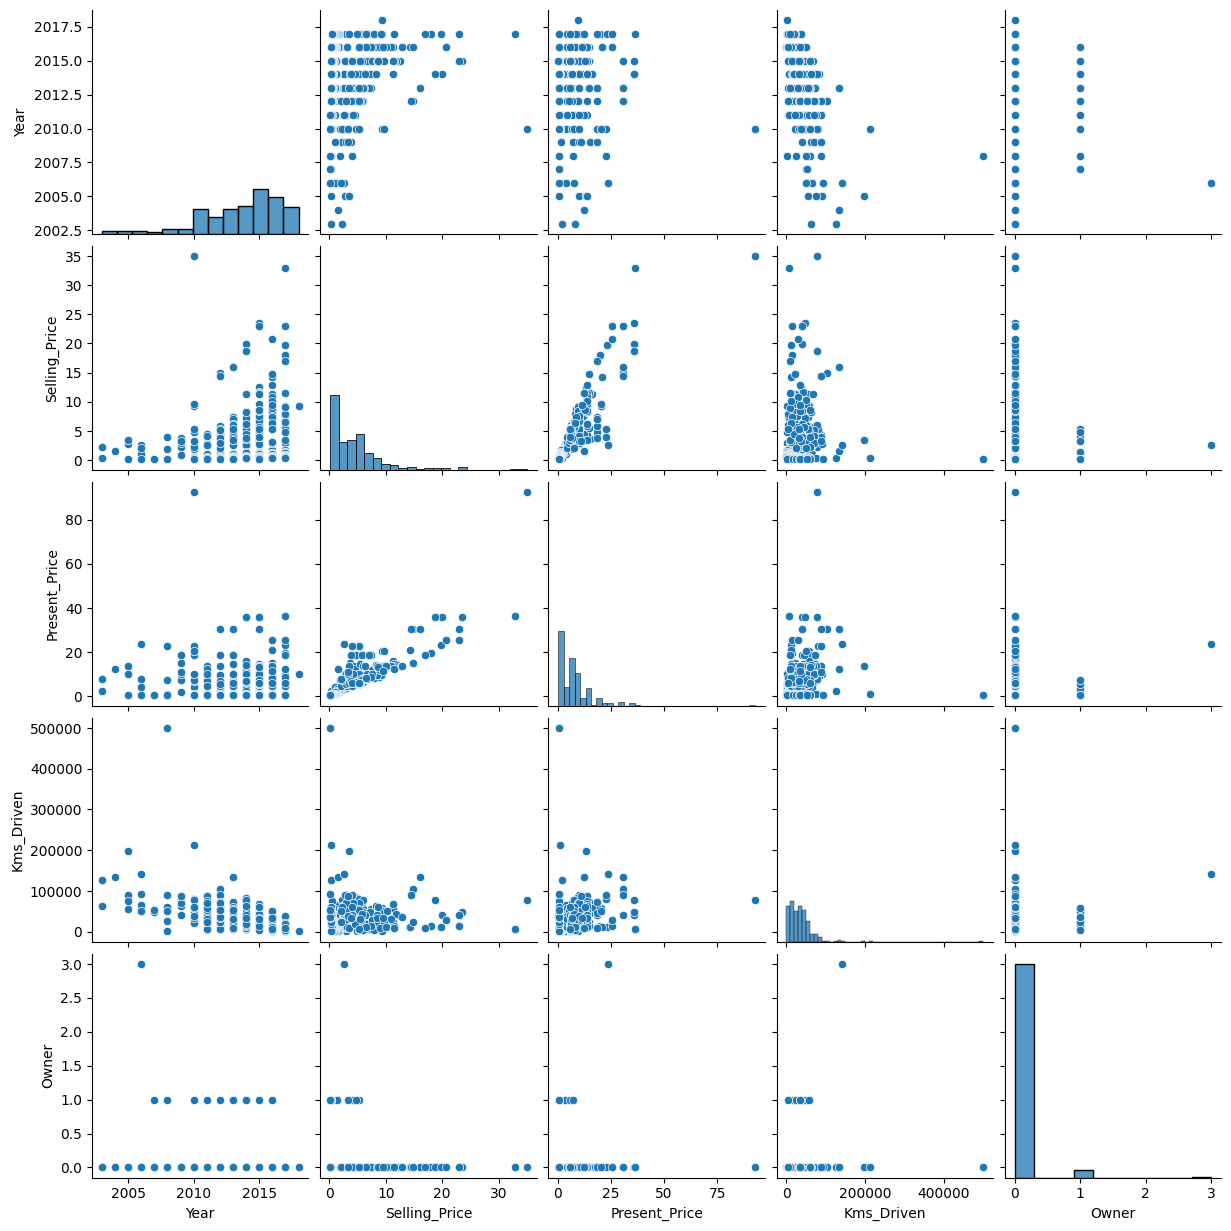

In [55]:
sn.pairplot(data)

In [56]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [61]:
import matplotlib.pyplot as plt

<Axes: xlabel='Seller_Type', ylabel='Selling_Price'>

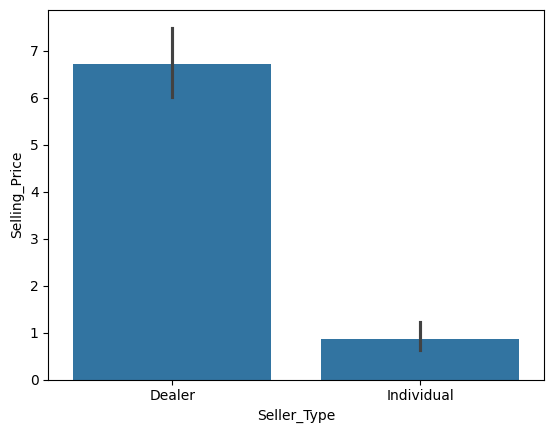

In [65]:
sn.barplot(x=data['Seller_Type'],y=data['Selling_Price'])

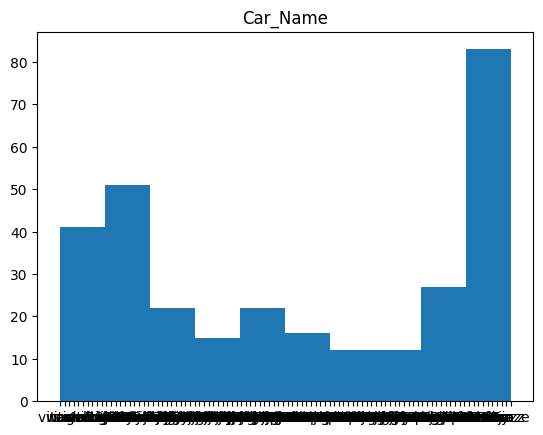

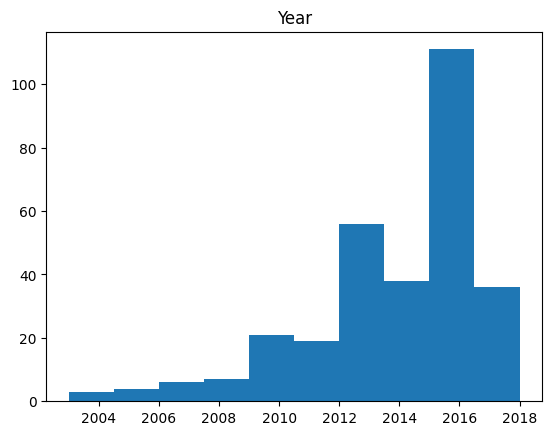

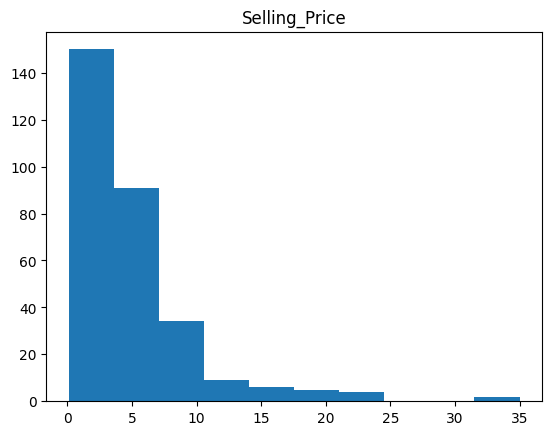

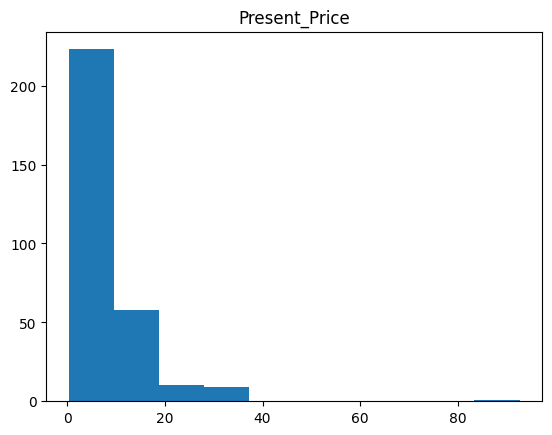

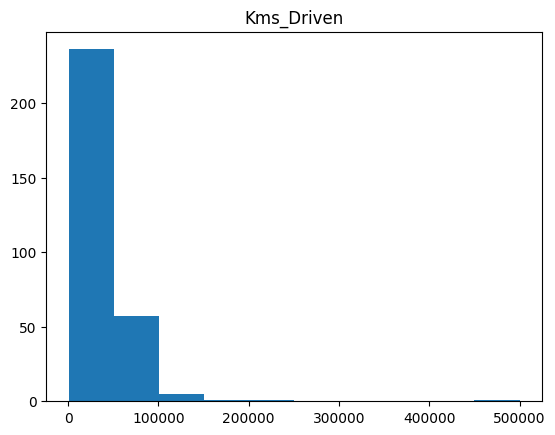

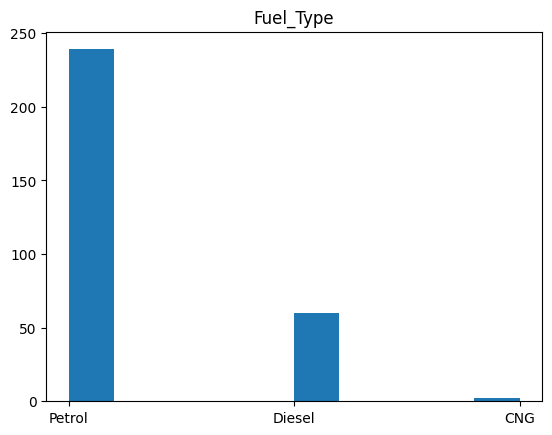

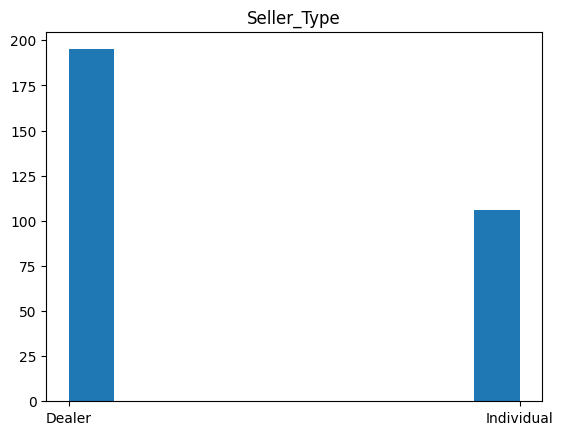

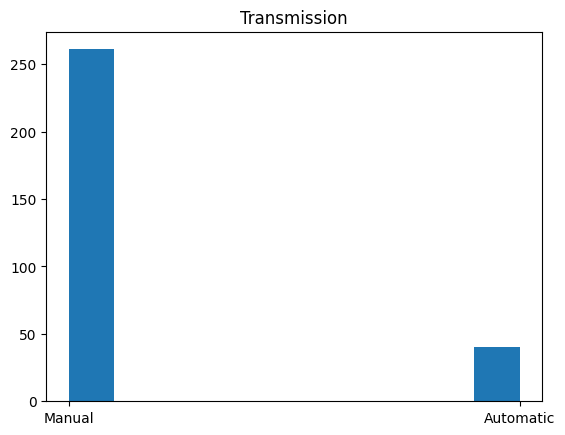

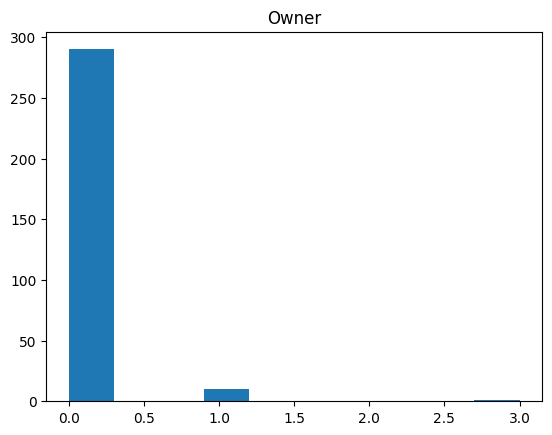

In [77]:
for i in data.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

In [15]:
# spliting of data

In [95]:
x=data.drop('Selling_Price',axis=1)

In [96]:
x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,12.50,9000,Diesel,Dealer,Manual,0


In [85]:
from sklearn.preprocessing import LabelEncoder

In [106]:
for col in x.columns:
    lb=LabelEncoder()
    if x[col].dtypes==object:
        x[col]=lb.fit_transform(x[col])

In [110]:
x.dtypes

Car_Name           int32
Year               int64
Present_Price    float64
Kms_Driven         int64
Fuel_Type          int32
Seller_Type        int32
Transmission       int32
Owner              int64
dtype: object

In [109]:
x['Car_Name'].unique()

array([90, 93, 68, 96, 92, 95, 91, 62, 76, 73, 63, 85,  0, 65, 89, 81, 86,
       71, 77, 78, 80, 70, 79, 67, 88, 49, 56, 42, 11, 46, 43, 40, 48, 41,
       44, 17, 45, 47,  6,  4, 32, 60, 58, 51, 14, 37, 20,  7,  5, 57, 12,
       15, 52, 26, 16, 61, 31, 54, 38,  8, 28,  1, 25, 34, 59, 13,  2, 35,
       22, 39, 30, 53, 23, 27, 33,  9, 50, 55, 36, 21, 29, 10, 24, 19, 18,
        3, 84, 82, 83, 75, 97, 74, 72, 94, 69, 66, 64, 87])

In [111]:
x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,5.59,27000,2,0,1,0
1,93,2013,9.54,43000,1,0,1,0
2,68,2017,9.85,6900,2,0,1,0
3,96,2011,4.15,5200,2,0,1,0
4,92,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,2016,11.60,33988,1,0,1,0
297,66,2015,5.90,60000,2,0,1,0
298,69,2009,11.00,87934,2,0,1,0
299,69,2017,12.50,9000,1,0,1,0


In [114]:
y=data['Selling_Price']
y


0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=32)

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# liner model

In [122]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [125]:
c=pd.DataFrame(x.columns,model.coef_)

In [126]:
c

,0
-0.004506,Car_Name
0.428594,Year
0.434156,Present_Price
-0.000006,Kms_Driven
-1.694744,Fuel_Type
-1.333976,Seller_Type
-1.492677,Transmission
-0.756028,Owner


In [129]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [130]:
train_p=model.predict(xtrain)

In [131]:
print('score',r2_score(ytrain,train_p))

score 0.880189235113184


In [133]:
print('mean_squared_error',mean_squared_error(ytrain,train_p))

mean_squared_error 3.4141463856412364


In [135]:
print('mean_squared_error',mean_absolute_error(ytrain,train_p))

mean_squared_error 1.2603501266451687


In [136]:
import math
print('rmse',math.sqrt(mean_squared_error(ytrain,train_p)))

rmse 1.847740887040506


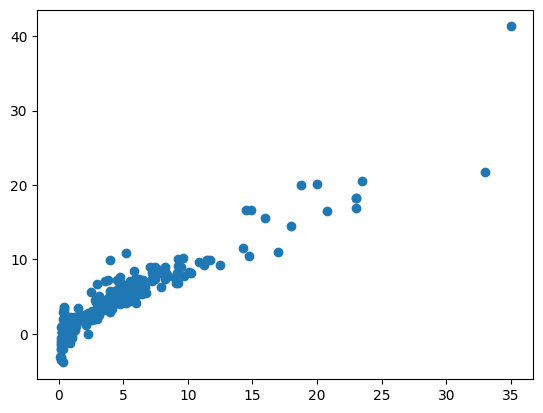

In [137]:
plt.scatter(ytrain,train_p)

In [138]:
#residual
r=ytrain-train_p

In [139]:
r

149   -1.161377
232    1.570069
109   -1.064518
191    1.142837
111   -0.703052
         ...   
71    -2.695192
252   -0.950110
88    -0.064057
43    -1.048547
215   -0.038956
Name: Selling_Price, Length: 240, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_18940\1691633155.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(r,bins=50)


<Axes: xlabel='Selling_Price', ylabel='Density'>

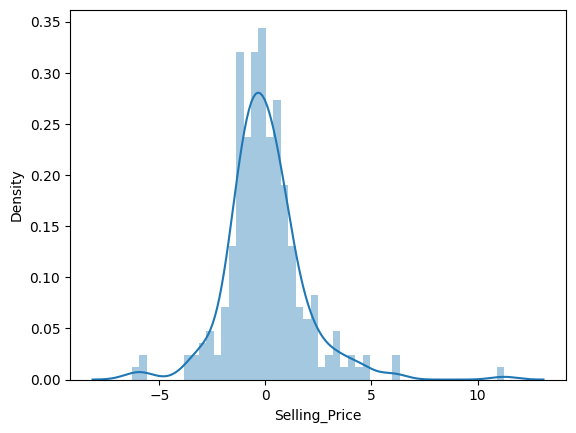

In [142]:
sn.distplot(r,bins=50)

In [143]:
test_p=model.predict(xtest)

In [144]:
print('score',r2_score(ytest,test_p))

score 0.8580450466488166


In [146]:
print('mean_squared_error',mean_squared_error(ytest,test_p))

mean_squared_error 2.0774894929236964


In [147]:
pd.DataFrame({'actual':ytest,'predict':test_p})

,actual,predict
91,11.25,9.905174
295,8.55,9.097446
19,2.65,3.039310
276,8.65,7.825281
60,6.95,9.047517
...,...,...
135,0.65,1.268804
66,19.75,14.323423
272,7.50,6.246354
11,6.85,7.977146


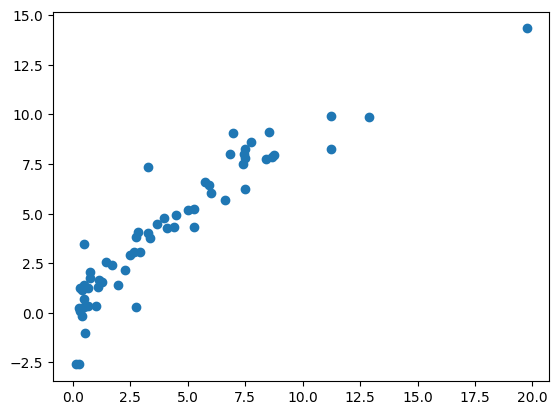

In [148]:
plt.scatter(ytest,test_p)

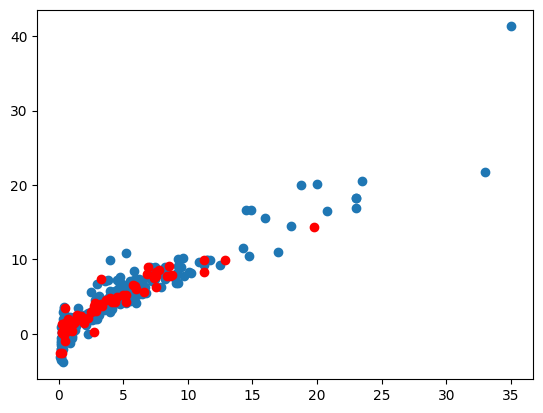

In [149]:
plt.scatter(ytrain,train_p)
plt.scatter(ytest,test_p,c='red')

# Gradient Boosting regressor

In [151]:
model=GradientBoostingRegressor()

In [152]:
model.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [153]:
train_p=model.predict(xtrain)

In [154]:
r2_score(ytrain,train_p)

0.9968553471778744

In [157]:
print('mean_squared_error',mean_squared_error(ytrain,train_p))

mean_squared_error 0.08961052103205644


In [158]:
test_p=model.predict(xtest)

In [159]:
r2_score(ytest,test_p)

0.9512112589102177

In [160]:
print('mean_squared_error',mean_squared_error(ytest,test_p))

mean_squared_error 0.7140159226162884


In [161]:
pd.DataFrame({'actual':ytest,'predict':test_p})

,actual,predict
91,11.25,10.068234
295,8.55,10.754153
19,2.65,2.447470
276,8.65,9.183130
60,6.95,6.977120
...,...,...
135,0.65,0.591984
66,19.75,15.392206
272,7.50,7.306084
11,6.85,7.887993


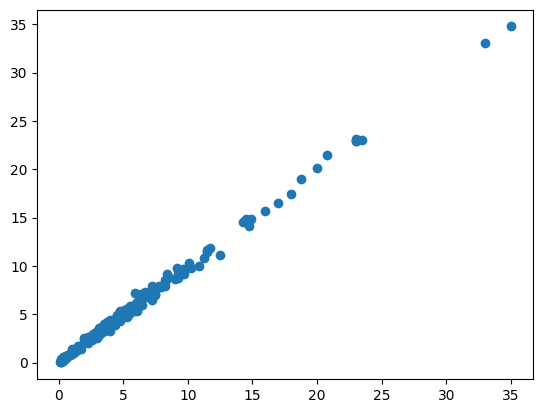

In [162]:
plt.scatter(ytrain,train_p)

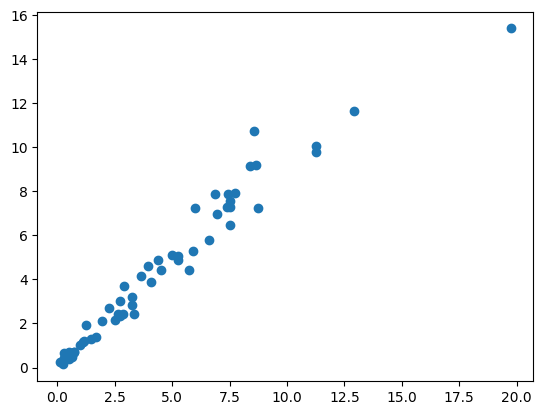

In [163]:
plt.scatter(ytest,test_p)

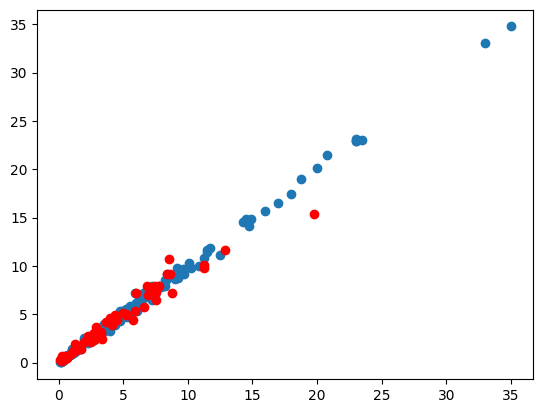

In [164]:
plt.scatter(ytrain,train_p)
plt.scatter(ytest,test_p,c='red')


# residual error finding

In [165]:
r=ytrain-train_p

C:\Users\USER\AppData\Local\Temp\ipykernel_18940\1691633155.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(r,bins=50)


<Axes: xlabel='Selling_Price', ylabel='Density'>

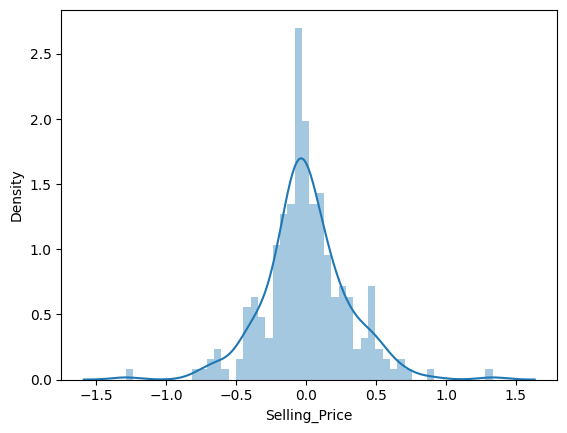

In [166]:
sn.distplot(r,bins=50)